# 실습1 트리 회귀

len 500


(array([ 0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.57115676,  0.57115676,
         0.57115676,  0.57115676,  0.57115676,  0.5

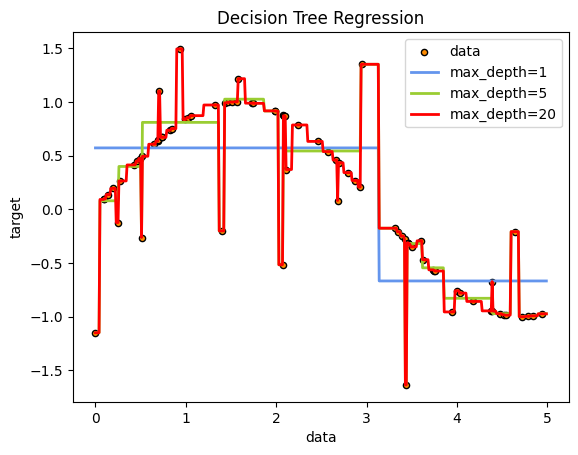

In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 랜덤한 데이터 셋을 생성하여 반환하는 함수입니다.
def load_data():
    '''
    np.random.RandomState(seed)는 난수 생성기 객체를 생성하는 함수
    여기서는 seed=1로 고정 → 재현 가능한(random but repeatable) 결과를 얻기 위함
    rng.rand(80, 1) → 0 이상 1 미만의 난수 80개를 세로 배열로 생성 ((80, 1) shape)
    * 5 → 난수 범위를 [0, 5)로 확장
    np.sort(..., axis=0) → 행 기준(각 열에 대해) 정렬
    → 즉, 입력값 X는 0~5 사이의 오름차순으로 정렬된 1차원 벡터

    np.sin(X) → X 값에 대해 사인 함수 적용 → (80, 1) 형태
    .ravel() → 다차원 배열을 평탄화하여 (80,) 형태로 바꿈
        X는 2차원이라 그냥 np.sin(X)를 하면 y도 2차원이 됨. y를 1차원으로 평탄화
    → 즉, y = sin(X) 형태의 기본 target 벡터
    y[::5] → 5개마다 하나씩 총 16개 요소 선택 (0, 5, 10, ..., 75 번째 인덱스)

    rng.rand(16) → [0, 1) 범위의 난수 16개 생성
    (0.5 - rng.rand(...)) → [-0.5, 0.5) 범위의 랜덤값
    * 3 → [-1.5, 1.5)로 스케일
    += → y값에 위 노이즈를 더함
    ⇒ 즉, 5개마다 하나씩 강한 노이즈를 포함시켜 모델의 일반화 성능을 평가할 수 있도록 함
    '''
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))

    return X, y


def DT_Reg(X, y, X_test, m_depth):

    reg = DecisionTreeRegressor(max_depth=m_depth)

    reg.fit(X, y)

    pred = reg.predict(X_test)

    return pred

# 회귀를 위한 의사결정 나무 결과를 그래프로 시각화합니다.
def Visualize(X, y, X_test, y_1, y_5, y_20):

    plt.figure()
    plt.scatter(X, y, s=20, edgecolor="black",
                c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue",
             label="max_depth=1", linewidth=2)
    plt.plot(X_test, y_5, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.plot(X_test, y_20, color="red", label="max_depth=20", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()


def main():

    X, y = load_data()

    '''
    0.0부터 5.0까지 0.01 간격으로 실수 값을 생성
    0.0, 0.01, 0.02, ..., 4.99 까지 → 총 500개
    shape = (500,)인 1차원 벡터

    기존 벡터를 **열벡터(col vector)**로 변환
    결과적으로 shape이 **(500, 1)**인 2차원 배열이 됨
    np.arange(0.0, 5.0, 0.01)         → shape: (500,)   → 1차원
    np.arange(0.0, 5.0, 0.01)[:, np.newaxis] → shape: (500, 1) → 2차원

    '''
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

    # max_depth = 1
    y_1 = DT_Reg(X, y, X_test, 1)
    print("len", len(y_1))
    # max_depth = 5
    y_5 = DT_Reg(X, y, X_test, 5)

    # max_depth = 20
    y_20 = DT_Reg(X, y, X_test, 10)

    '''
    그래프에서 16개의 노이즈가 왜 나타나지?
    노이즈는 학습때만 주고 테스트셋은 그냥 0부터 5까지 0.01 사이의 실수잖아
    결정트리 회귀는 학습 데이터의 y값을 ‘그대로’ 반영해서 리프 노드의 예측값으로 사용하기 때문에,
    학습 데이터에 존재하는 노이즈가 그대로 모델의 예측 함수에 반영되어
    테스트셋에 대해서도 "튀는 값"으로 나타나는 것이야.
    → y[::5] = 0, 5, 10, 15, ..., 75번째 값들이 노이즈가 추가된 값
    → 총 16개의 데이터 포인트가 sin(x) 곡선에서 벗어나 있음

    결정트리 회귀는 입력값 X의 구간을 나누고,
    각 구간에 포함된 y값들의 평균을 예측값으로 사용함

    그런데, 어떤 구간이 노이즈가 포함된 y값을 포함한다면:
    그 구간의 평균값이 왜곡되고
    그 구간에 속하는 테스트 샘플들(X_test)도 그 왜곡된 값을 예측값으로 받게 됨
    결과적으로, 예측 함수가 매끄럽게 이어지지 않고, 일부 구간에서 '툭 튀는 모양'이 생김

    max_depth=1이면, 전체를 1~2개 구간만으로 나누므로 노이즈의 영향이 평균에 희석됨
    max_depth=20이면, 거의 각 학습 샘플마다 개별 노드를 생성할 정도로 미세하게 분할되기 때문에
    → 노이즈가 있는 샘플도 따로 분할되어 해당 y값을 그대로 예측하게 됨
    → 따라서 예측 곡선이 노이즈를 그대로 따라가는 과적합 곡선이 됨
    깊은 트리일수록	노이즈까지 과하게 학습 → 테스트셋 예측이 노이즈까지 반영한 오버핏팅 곡선으로 나타남
    1. 결정트리는 훈련 데이터에 완전히 적합하는 방향으로 분할하기 때문에
    학습 데이터가 조금만 바뀌어도 → 트리 구조 자체가 완전히 달라지는
    고분산(high variance) 모델임.
    2. 특히, max_depth를 충분히 크게 주면
    학습 샘플 하나하나를 개별 리프노드로 분리함 (즉, leaf 하나에 샘플 하나)
    이 경우 해당 노이즈 샘플은 그대로 리프노드 예측값이 됨
    즉, 노이즈까지 완전히 외운(overfit) 상태 → 과적합
    3. max_depth를 낮추면 (e.g. 1~3)
    데이터 전체를 몇 개의 구간으로만 나눔
    그러면 노이즈는 평균에 묻혀 덜 반영됨
    이 경우 편향은 커지지만, 분산은 줄어듦
    ⇒ underfitting 경향


    편향 (Bias)
        모델의 평균 예측값과 실제 정답 값(참값) 사이의 차이
        → 모델이 얼마나 잘못된 가정을 하고 있는가? 단순 선형분류기 같은 단순한 모델은 상대적으로 편향이 높고 분산이 낮음

    분산 (Variance)
        학습 데이터가 바뀔 때 모델의 예측이 얼마나 요동치는가
        → 모델이 얼마나 민감한가?  깊은 트리 같은 복잡한 모델은 편향이 상대적으로 낮고 분산이 높음



    '''
    Visualize(X, y, X_test, y_1, y_5, y_20)


    return y_1, y_5, y_20

main()


500


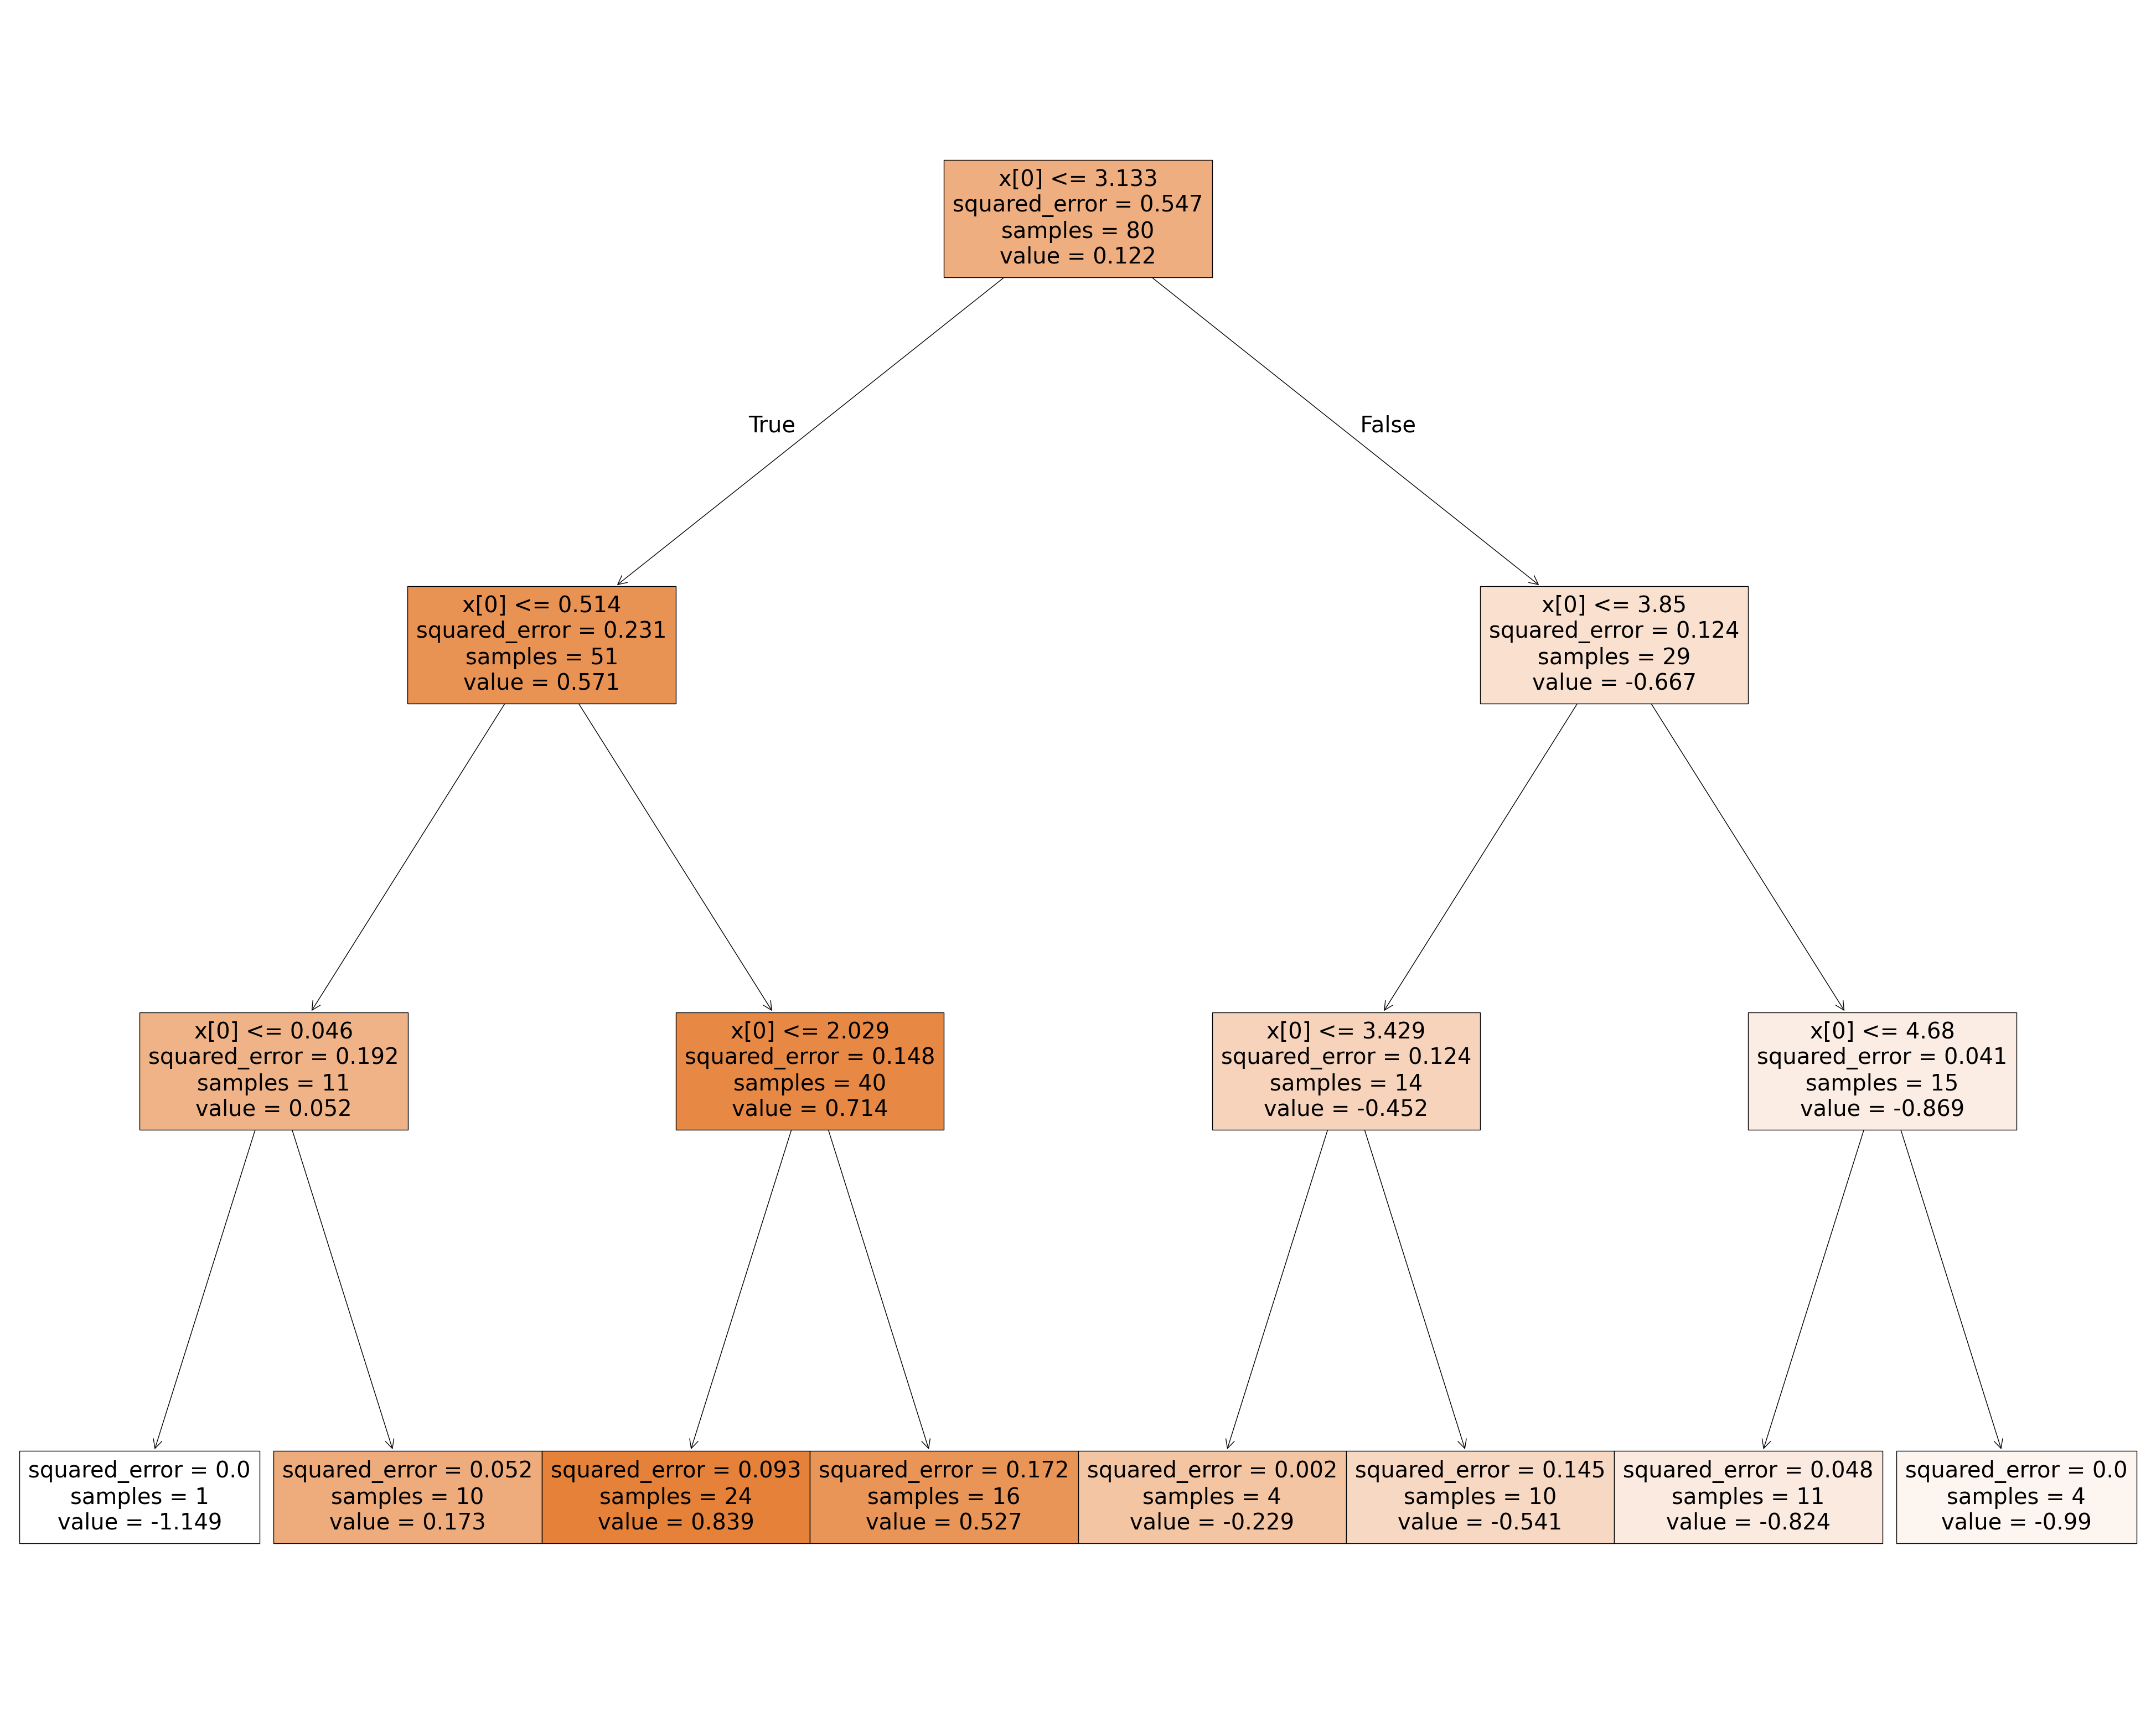

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

def load_data():

    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))

    return X, y

def DT(X, y, X_test, m_depth):

    reg = DecisionTreeRegressor(max_depth=m_depth)
    reg.fit(X, y)
    return reg


from sklearn.tree import plot_tree

def draw_tree(dt):
    plt.figure(figsize=(50,40))

    # plot_tree(dt)
    plot_tree(dt, max_depth=3, filled=True)
    return plt.show()

X, y = load_data()

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
print(len(X_test))
dt = DT(X, y, X_test, 3)
draw_tree(dt)

# 실습2 트리 분류

feature_names : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names : ['setosa' 'versicolor' 'virginica']
테스트 데이터에 대한 예측 정확도 : 0.9667
0.0075
0.0188
0.5859
0.3878


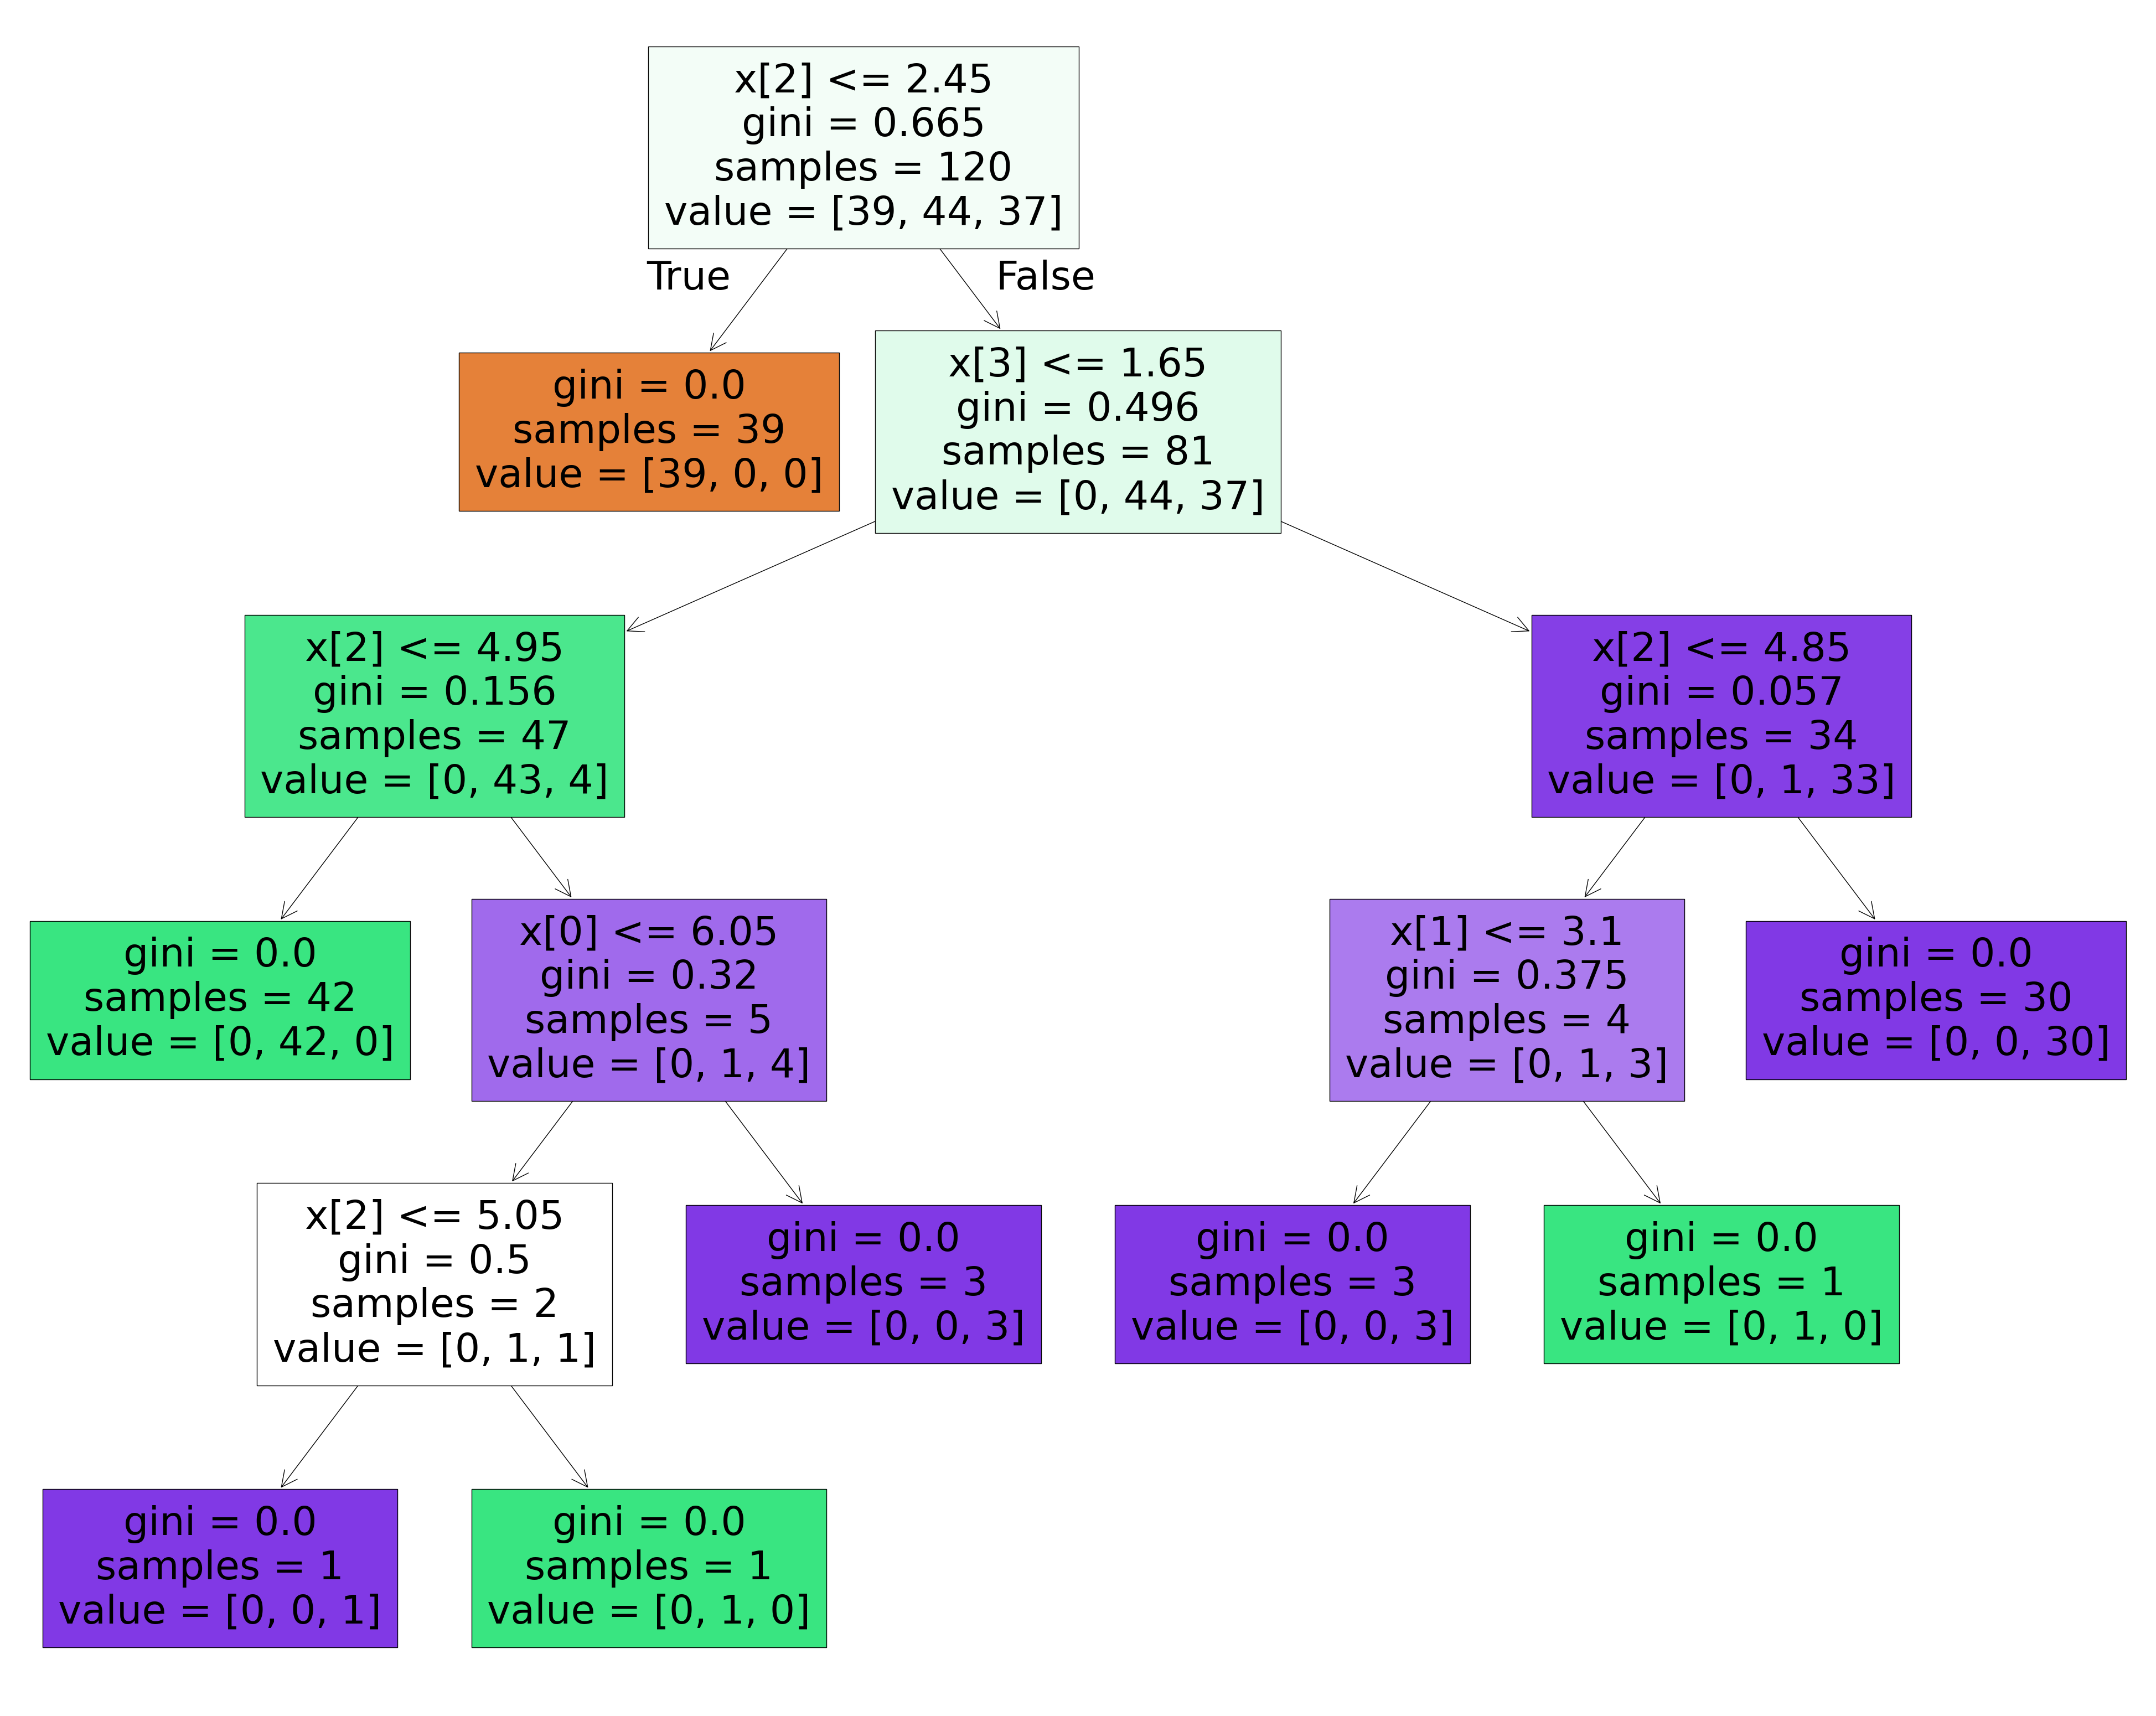

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2])

In [ ]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def load_data():
    '''
    return_X_y=True는 모델 학습에 바로 쓰고 싶을 때 간결함을 위해 자주 사용됨
    반환값을 단순히 (X, y) 튜플로 줌
    즉, 데이터(data)와 타깃(target)만 반환

    return_X_y=False (기본값)
    반환값은 Bunch 객체 (딕셔너리와 비슷한 구조)
    구조는 다음과 같음:

    {
    'data': ...,         # X (입력 피처)
    'target': ...,       # y (정답 레이블)
    'feature_names': ...,
    'target_names': ...,
    ...
    }

    iris = load_iris()
    X = iris.data
    y = iris.target
    '''
    # X, y = load_iris(return_X_y = True)
    iris = load_iris()
    X = iris.data
    y = iris.target

    print(f"feature_names : {iris.feature_names}")
    print(f"target_names : {iris.target_names}")

    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=100)

    return train_X, test_X, train_y, test_y

"""
2. 분류 의사결정 나무 모델로
   학습, 예측을 수행한 후 예측 결과를 반환하는 함수를 구현합니다.
"""
def DT_Clf(train_X, train_y, test_X):

    clf = DecisionTreeClassifier()

    clf.fit(train_X, train_y)

    pred = clf.predict(test_X)

    return pred


from sklearn.tree import plot_tree

def draw_tree(dt):
    plt.figure(figsize=(50,40))

    # plot_tree(dt)
    plot_tree(dt, max_depth=5, filled=True)
    return plt.show()

def DT(train_X, train_y, test_X):

    clf = DecisionTreeClassifier()

    clf.fit(train_X, train_y)

    return clf

def main():

    train_X, test_X, train_y, test_y = load_data()

    pred = DT_Clf(train_X, train_y, test_X)
    print('테스트 데이터에 대한 예측 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))

    clf = DT(train_X, train_y, test_X)

    for importance in clf.feature_importances_:
        print(f"{importance:.4f}")

    draw_tree(clf)
    return pred


main()


# 실습3 보팅

In [ ]:

import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

'''
소프트보팅이 하드보팅보다 성능이 더 좋은 까닭은
하드보팅에선 정답 클래스라고 예측한 의견만 반영되는데
소프트보팅에선 모든 클래스에 대해 예측한 의견이 평균으로 반영되기 때문


✅ 왜 Soft Voting이 더 나은가?
1. 예측 강도를 반영함
어떤 분류기는 0.51로 class 1을 예측, 다른 분류기는 0.99로 예측했을 수도 있음
Hard voting에서는 둘 다 그냥 "1"로 간주하지만,
Soft voting에서는 0.75의 평균 확률로 class 1에 대한 강한 자신감이 반영됨

2. 근소한 차이도 반영
Hard voting은 단지 과반수만 확인 → 정보 손실 큼
Soft voting은 경계 근처의 예측을 더 정교하게 처리함

3. 모델 간 불확실성 조율 가능
어떤 모델은 애매하게 확률을 나눴고, 어떤 모델은 한쪽으로 치우친 예측을 했을 때
Soft voting은 이 불확실성을 평균 내어 더 정교한 합의를 도출


⚠️ 예외: 언제 Hard Voting이 더 나을 수 있나?
모델이 확률 추정이 부정확하거나 calibration이 안된 경우
예: 의사결정트리처럼 확률 추정값이 왜곡될 수 있는 모델
이럴 땐 오히려 소프트 보팅이 잘못된 정보까지 평균하게 되어 성능이 떨어질 수도 있음

랜덤포레스트는 다수의 약한 결정트리를 사용하는데,
이 트리들은 확률 예측(calibrated probability)이 정확하지 않을 수 있음
→ 이 경우엔 하드보팅이 더 robust할 수 있음
하지만 경험적으로 보면, 소프트보팅으로 전환 시 성능이 소폭 개선되는 경우도 많음

다른 추천 조합
로지스틱 회귀 (고편향) + 결정트리 (고분산)
단순 경계 + 복잡 경계 보완, 선형/비선형 동시에 대응

Gradient Boosting + Naive Bayes
Gradient Boosting  강력한 비선형, 고복잡도 |
Naive Bayes 매우 단순, 고편향
빠르고 가벼운 베이지안과 느리지만 강력한 부스팅을 결합해 속도-성능 절충

신경망(NN) + 트리 기반 모델 (RF, XGBoost)
신경망 유연한 비선형, 고복잡도, 고분산 |
트리 모델 규칙 기반, 다른 에러 패턴 |
이점 완전히 다른 학습 구조를 결합 → 서로의 오류 패턴이 다름 → 강한 앙상블 효과

LightGBM + KNN
LightGBM 고성능, 정교한 트리 앙상블 |
KNN 국소성, 메모리 기반 |
이점 KNN은 전역 모델이 놓치는 국소 패턴 보완

핵심 전략: 다른 성격의 모델을 조합하라
앙상블이 효과적이려면 비슷한 예측을 하는 모델이 아니라,
다른 방식으로 예측하고 다른 실수를 하는 모델들끼리 조합해야 한다.
단순히 좋은 모델을 모으는 게 아니라, 서로 다르게 실패하는 모델을 조합하는 것이 핵심이다.
'''
def load_data():

    X, y = load_breast_cancer(return_X_y = True)

    train_X, test_X, train_y ,test_y = train_test_split(X, y, test_size = 0.2, random_state = 156)

    return train_X, test_X, train_y ,test_y
"""
1. 다양한 모델을 사용하는 VotingClassifier를 정의하여
   학습시키고, 예측을 수행한 결과를 반환하는 함수를 구현합니다.
"""

from sklearn.tree import DecisionTreeClassifier

def Voting_Clf(train_X, test_X, train_y ,test_y):

    lr_clf = LogisticRegression()
    knn_clf = KNeighborsClassifier()


    vo_clf = VotingClassifier(estimators =[('LogisticRegression', lr_clf), ('KNeighborsClassifier', knn_clf)], voting="soft" )
    vo_clf.fit(train_X, train_y)

    pred = vo_clf.predict(test_X)

    return lr_clf, knn_clf, vo_clf, pred

def Voting_Clf2(train_X, test_X, train_y ,test_y):


    knn_clf = KNeighborsClassifier()
    dt_clf = DecisionTreeClassifier()

    vo_clf = VotingClassifier(estimators =[('DecisionTreeClassifier', dt_clf), ('KNeighborsClassifier', knn_clf)], voting="soft" )
    vo_clf.fit(train_X, train_y)

    pred = vo_clf.predict(test_X)

    return dt_clf, knn_clf, vo_clf, pred

def Voting_Clf3(train_X, test_X, train_y ,test_y):


    lr_clf = LogisticRegression()
    dt_clf = DecisionTreeClassifier(max_depth = 5)

    vo_clf = VotingClassifier(estimators =[('DecisionTreeClassifier', dt_clf), ('LogisticRegression', lr_clf)], voting="soft" )
    vo_clf.fit(train_X, train_y)

    pred = vo_clf.predict(test_X)

    return dt_clf,  lr_clf, vo_clf, pred
# 데이터를 불러오고, 모델 학습 및 예측을 진행하기 위한 함수입니다.
def main():

    train_X, test_X, train_y ,test_y = load_data()

    # lr_clf, knn_clf,vo_clf, pred = Voting_Clf(train_X, test_X, train_y ,test_y)
    # dt_clf, knn_clf,vo_clf, pred = Voting_Clf2(train_X, test_X, train_y ,test_y)
    dt_clf, lr_clf,vo_clf, pred = Voting_Clf3(train_X, test_X, train_y ,test_y)

    print('> Voting Classifier 정확도 : {0:.4f}\n'.format(accuracy_score(test_y, pred)))

    # 다른 분류기를 각각 학습했을 때 결과 예측
    # classifiers = [lr_clf, knn_clf]
    # for classifier in classifiers:
    #     classifier.fit(train_X, train_y)
    #     pred = classifier.predict(test_X)
    #     class_name = classifier.__class__.__name__
    #     print("> {0} 정확도 : {1:.4f}".format(class_name, accuracy_score(test_y, pred)))

    # classifiers = [dt_clf, knn_clf]
    # for classifier in classifiers:
    #     classifier.fit(train_X, train_y)
    #     pred = classifier.predict(test_X)
    #     class_name = classifier.__class__.__name__
    #     print("> {0} 정확도 : {1:.4f}".format(class_name, accuracy_score(test_y, pred)))

    classifiers = [dt_clf, lr_clf]
    for classifier in classifiers:
        classifier.fit(train_X, train_y)
        pred = classifier.predict(test_X)
        class_name = classifier.__class__.__name__
        print("> {0} 정확도 : {1:.4f}".format(class_name, accuracy_score(test_y, pred)))

if __name__ =="__main__":
    main()




# 실습4 배깅

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 유방암 데이터를 불러오고,학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    X, y = load_breast_cancer(return_X_y = True)

    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 156)

    return train_X, test_X, train_y, test_y

"""
그냥 랜덤 포레스트를 쓰면 될거 같은데 왜 사이킷런에 BaggingClassifier 이 있지?

RandomForest는 "트리 + Bagging + 피처 랜덤성"이 결합된 완제품
결정트리를 그대로 써서 더 작은, 얕은 트리로 Bagging만 하고 싶을 때
피처 서브샘플링을 제어하고 싶을 때
BaggingClassifier는 max_features, bootstrap_features 인자로 피처 샘플링도 가능 (랜덤포레스트는 피쳐를 비복원 추출만 할 수 있다. )
RandomForest처럼 자동화된 게 아니라 정밀 제어 가능
비트리 모델에도 Bagging을 적용하고 싶을 때 : SVM, KNN, 로지스틱 회귀, 나이브 베이즈 등 어떤 모델에도 적용 가능
"""
def Bagging_Clf(train_X, test_X, train_y, test_y):

    ba_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

    ba_clf.fit(train_X, train_y)

    pred = ba_clf.predict(test_X)

    return ba_clf, pred

# 데이터를 불러오고, 모델 학습 및 예측을 진행하기 위한 함수입니다.
def main():

    train_X, test_X, train_y, test_y = load_data()

    ba_clf, pred = Bagging_Clf(train_X, test_X, train_y, test_y)

    print('Bagging Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))

    # 단일 의사결정 나무를 학습했을 때 결과 예측하기
    single_dt = DecisionTreeClassifier()
    single_dt.fit(train_X,train_y)
    single_pred = single_dt.predict(test_X)
    print('Single Decision Tree Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, single_pred)))

if __name__ =="__main__":
    main()